# i. Introduction
Marchelly Gideon Tambunan

- Dataset: Credit Card Default
- Problem: Mencari Model terbaik untuk memprediksi prediksi pembayaran bulan selanjutnya

# ii. SQL Query

SELECT limit_balance, 
cast(sex as int) as sex, 
cast(education_level as integer) as education_level, 
cast(marital_status as integer) as marital_status, 
age, 
pay_0, 
pay_2, 
pay_3, 
pay_4, 
cast(pay_5 as float64) as pay_5, 
cast(pay_6 as float64)pay_6, 
bill_amt_1, 
bill_amt_2, 
bill_amt_3, 
bill_amt_4, 
bill_amt_5, 
bill_amt_6, 
pay_amt_1, 
pay_amt_2, 
pay_amt_3, 
pay_amt_4, 
pay_amt_5, 
pay_amt_6, 
cast(default_payment_next_month as integer)default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` 
LIMIT 7988

# iii. Import Libraries

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
from numpy import percentile
import seaborn as sns
import matplotlib.pyplot as plt
import phik
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
from feature_engine.outliers import Winsorizer
import pickle
import joblib
import warnings
warnings.simplefilter("ignore")

# iv. Data Loading

In [2]:
df = pd.read_csv('h8dsft_P1M1_Marchelly_Gideon.csv',na_values=[" ", "-", "?" ,"n/a", "na", "--"," ?"])
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [3]:
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

we have all numerical data type in our dataset. let see if there has null value or not.

because the data taken from google cloud platform, we need to describe each column for know the information they contain. we take description of each column from google cloud platform.

|No|Column Name|Description|
|-|----|----|
|1|Balance Limit|Amount of given credit in New Taiwan Dollars (NTD)|
|2|sex|1 = Male <br> 2 = Female|
|3|education level|1 = graduate school <br> 2 = university <br> 3 = high school <br> 4 = others <br> 5 & 6 = unknown|
|4|marital_status|1 = married <br> 2 = single <br> 3 = others|
|5|age|age in years|
|6|pay_0|Repayment status in September, 2005: <br> -1 = pay duly <br> 0 = ontime payment <br> 1 = payment delay for one month <br> 2 = payment delay for two months, ... <br> 8 = payment delay for eight months <br> 9 = payment delay for nine months and above)|
|7|pay_2|Repayment status in August, 2005 (scale same as above)|
|8|pay_3|Repayment status in July, 2005 (scale same as above)|
|9|pay_4|Repayment status in June, 2005 (scale same as above)|
|10|pay_5|Repayment status in May, 2005 (scale same as above)|
|11|pay_6|Repayment status in April, 2005 (scale same as above)|
|12|bill_amt_1|Amount of bill statement in September, 2005 (NTD)|
|13|bill_amt_2|Amount of bill statement in August, 2005 (NTD)|
|14|bill_amt_3|Amount of bill statement in July, 2005 (NTD)|
|15|bill_amt_4|Amount of bill statement in Juny, 2005 (NTD)|
|16|bill_amt_5|Amount of bill statement in May, 2005 (NTD)|
|17|bill_amt_6|Amount of bill statement in April, 2005 (NTD)|
|18|pay_amt_1|Amount of previous payment in September, 2005 (NTD)|
|19|pay_amt_2|Amount of previous payment in August, 2005 (NTD)|
|20|pay_amt_3|Amount of previous payment in July, 2005 (NTD)|
|21|pay_amt_4|Amount of previous payment in Juny, 2005 (NTD)|
|22|pay_amt_5|Amount of previous payment in May, 2005 (NTD)|
|23|pay_amt_6|Amount of previous payment in April, 2005 (NTD)|
|24|default_payment_next_month|Default payment: <br> 1=yes <br> 0=no|

In [5]:
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

there's no null value in our data. now lets see any duplicated data

In [6]:
df.duplicated().sum()

1

we have just one duplicated data. let's check thia out

In [7]:
duplic = df[df.duplicated()]
duplic

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2815,200000.0,2,1,1,34.0,1.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


we will remove the duplicated data and reset index the data

In [8]:
# menghapus index data
df.drop(duplic.index, axis = 0, inplace=True)
df.reset_index(inplace=True, drop=True)
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2960,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2961,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2962,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


In [9]:
data = df.copy()

# v. Exploratory Data Analysis (EDA)

### Checking Correlation

Before we explore our data, we want to check correlation the columns against default_payment_next_month

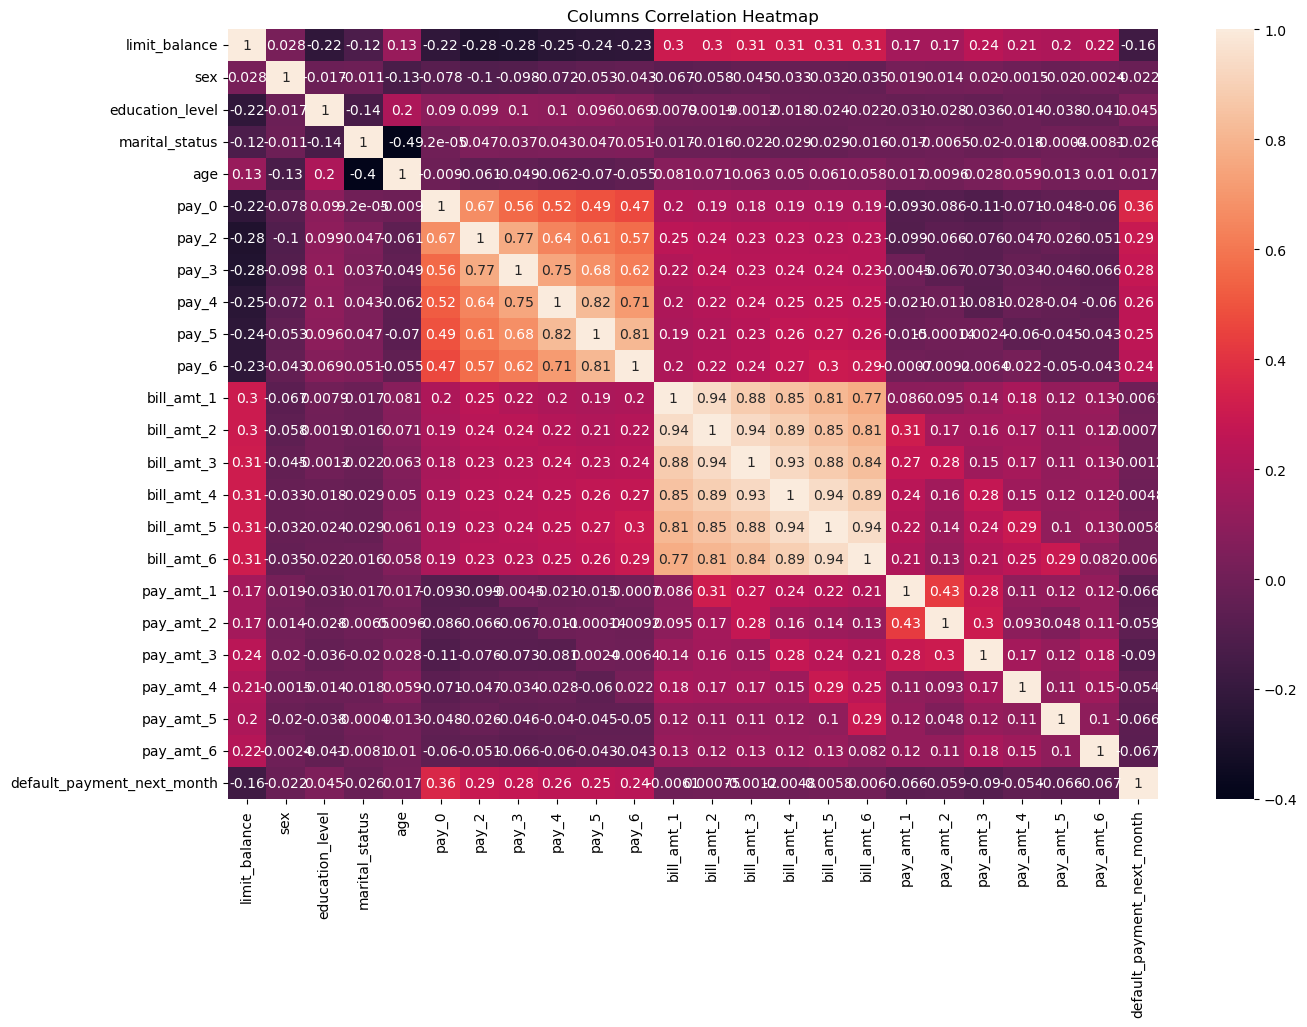

In [10]:
cor = data.corr()

plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True)
plt.title("Columns Correlation Heatmap")
plt.show()

del cor

Here we can see that some columns has a correlation against our target. we will make grouping and check the correlation again to make a good visual and readable

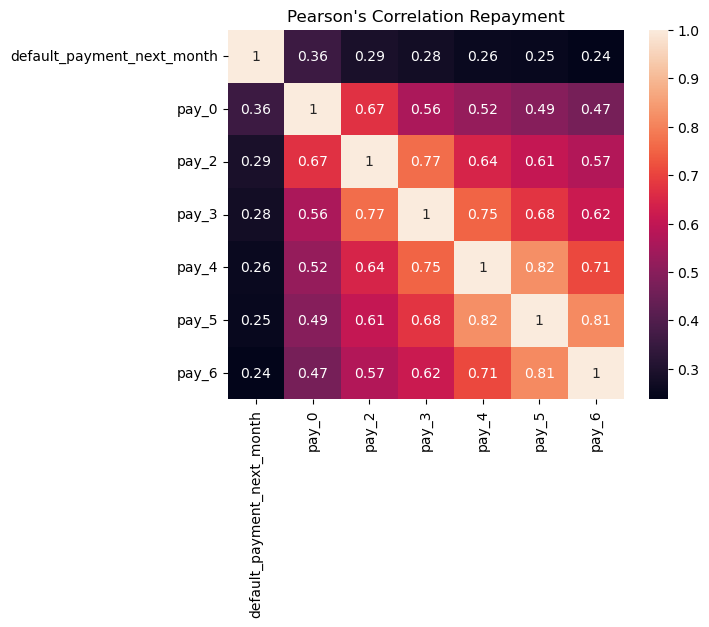

In [11]:
pay_corr = ['default_payment_next_month','pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
sns.heatmap(data=df[pay_corr].corr(), annot=True)
plt.title("Pearson's Correlation Repayment");

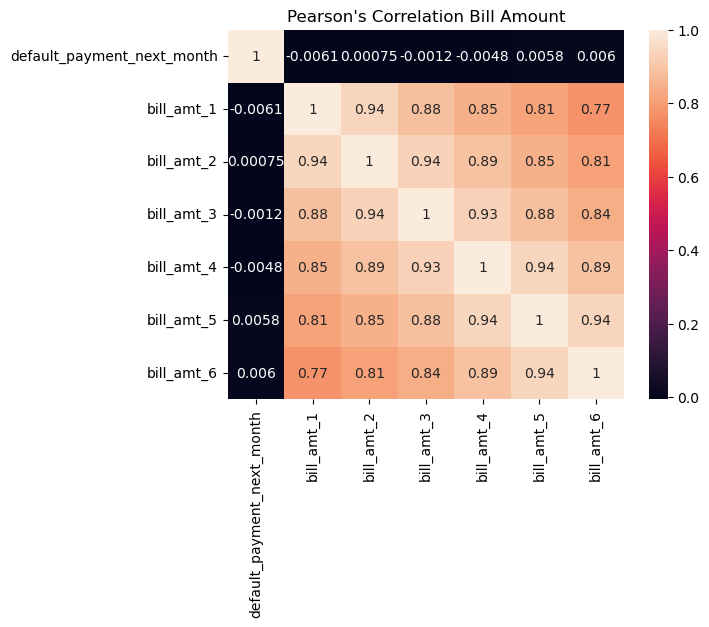

In [12]:
bill_corr = ['default_payment_next_month', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']
sns.heatmap(data=df[bill_corr].corr(), annot=True)
plt.title("Pearson's Correlation Bill Amount");

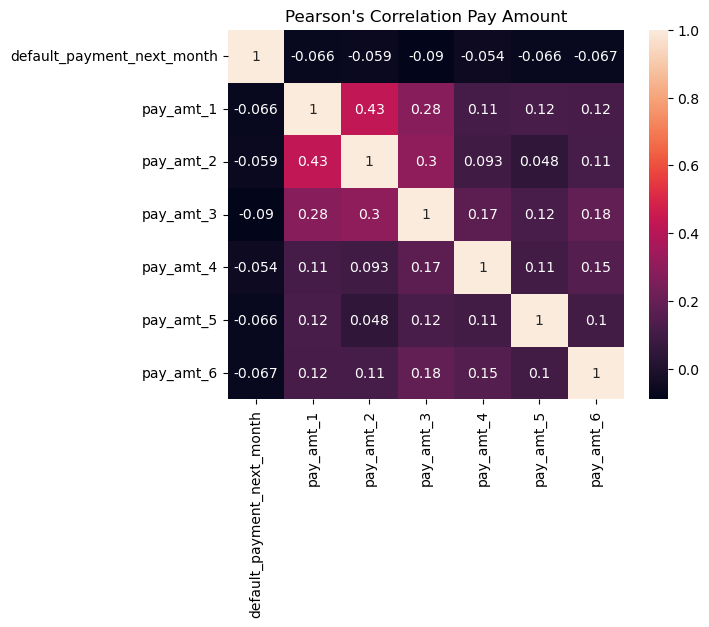

In [13]:
# search correlation between bill payment and payment amount
pay_amt_corr = ['default_payment_next_month', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
sns.heatmap(data=df[pay_amt_corr].corr(), annot=True)
plt.title("Pearson's Correlation Pay Amount");

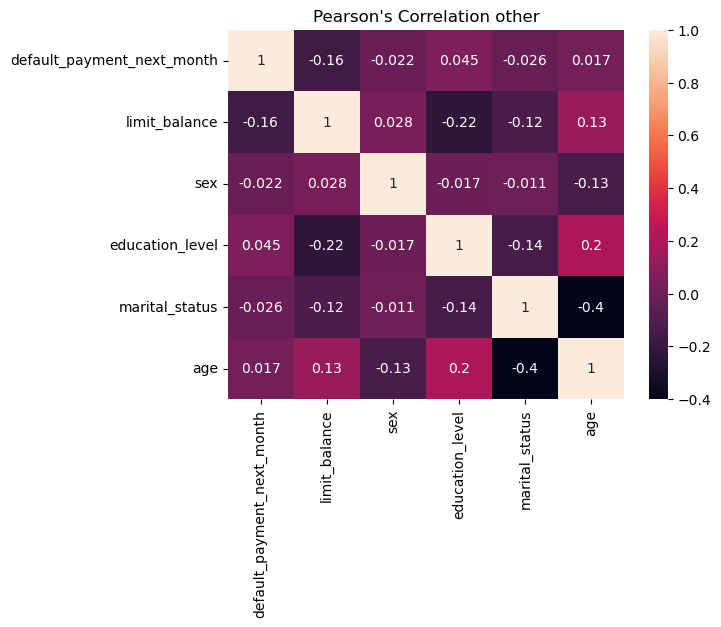

In [14]:
# search correlation between bill payment and other
other_corr = ['default_payment_next_month', 'limit_balance', 'sex', 'education_level', 'marital_status', 'age']
sns.heatmap(data=df[other_corr].corr(), annot=True)
plt.title("Pearson's Correlation other");

Here we can see that limit balance has a negative correlation with our target, and has the highest correlation compared to other feature. Therefore we will use this feature.

### Default Payment

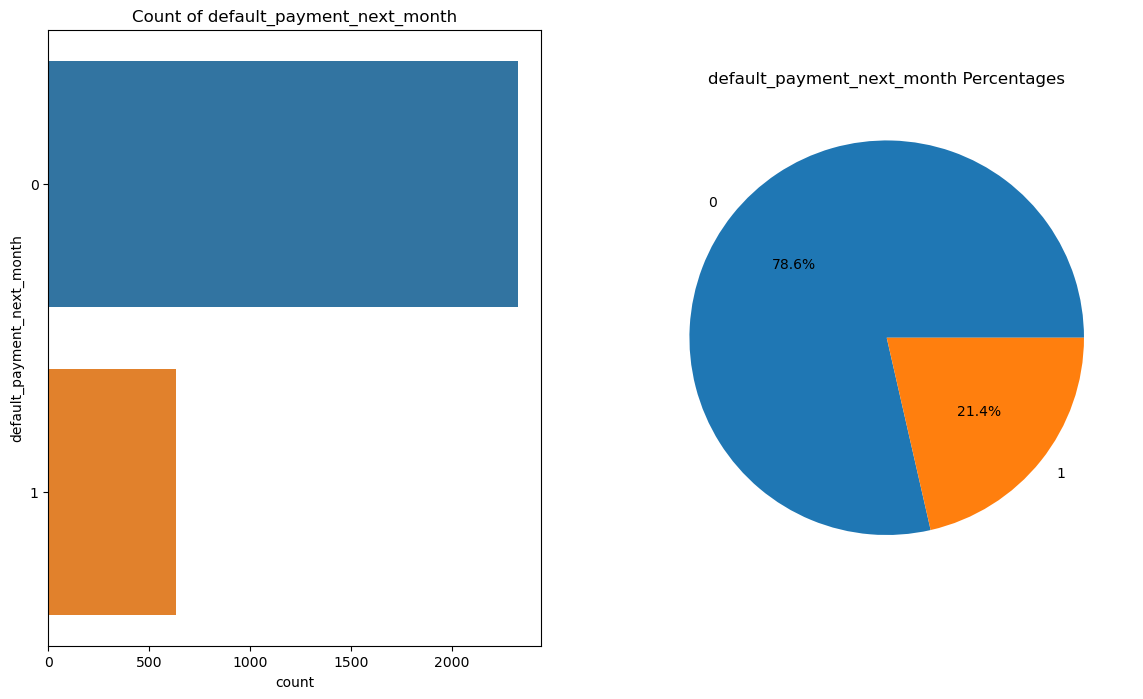

In [15]:
# Plot our target column
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.countplot(y='default_payment_next_month', data=df)
plt.title('Count of default_payment_next_month')

plt.subplot(1, 2, 2)
plt.pie(df.groupby('default_payment_next_month').size(), labels=df.groupby('default_payment_next_month').size().index, autopct='%1.1f%%')
plt.title('default_payment_next_month Percentages')
plt.show()

Based on the plot that is showing the graphic of comparison between total data of both classes, we can tell that we have imbalanced dataset.

### Repayment Status

we will explore repayment status in april 2005 - september 2005

The value for this columns is (-2) to 8. These numbers represent the status of customers payment.  ((-2) to 0=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, and above)

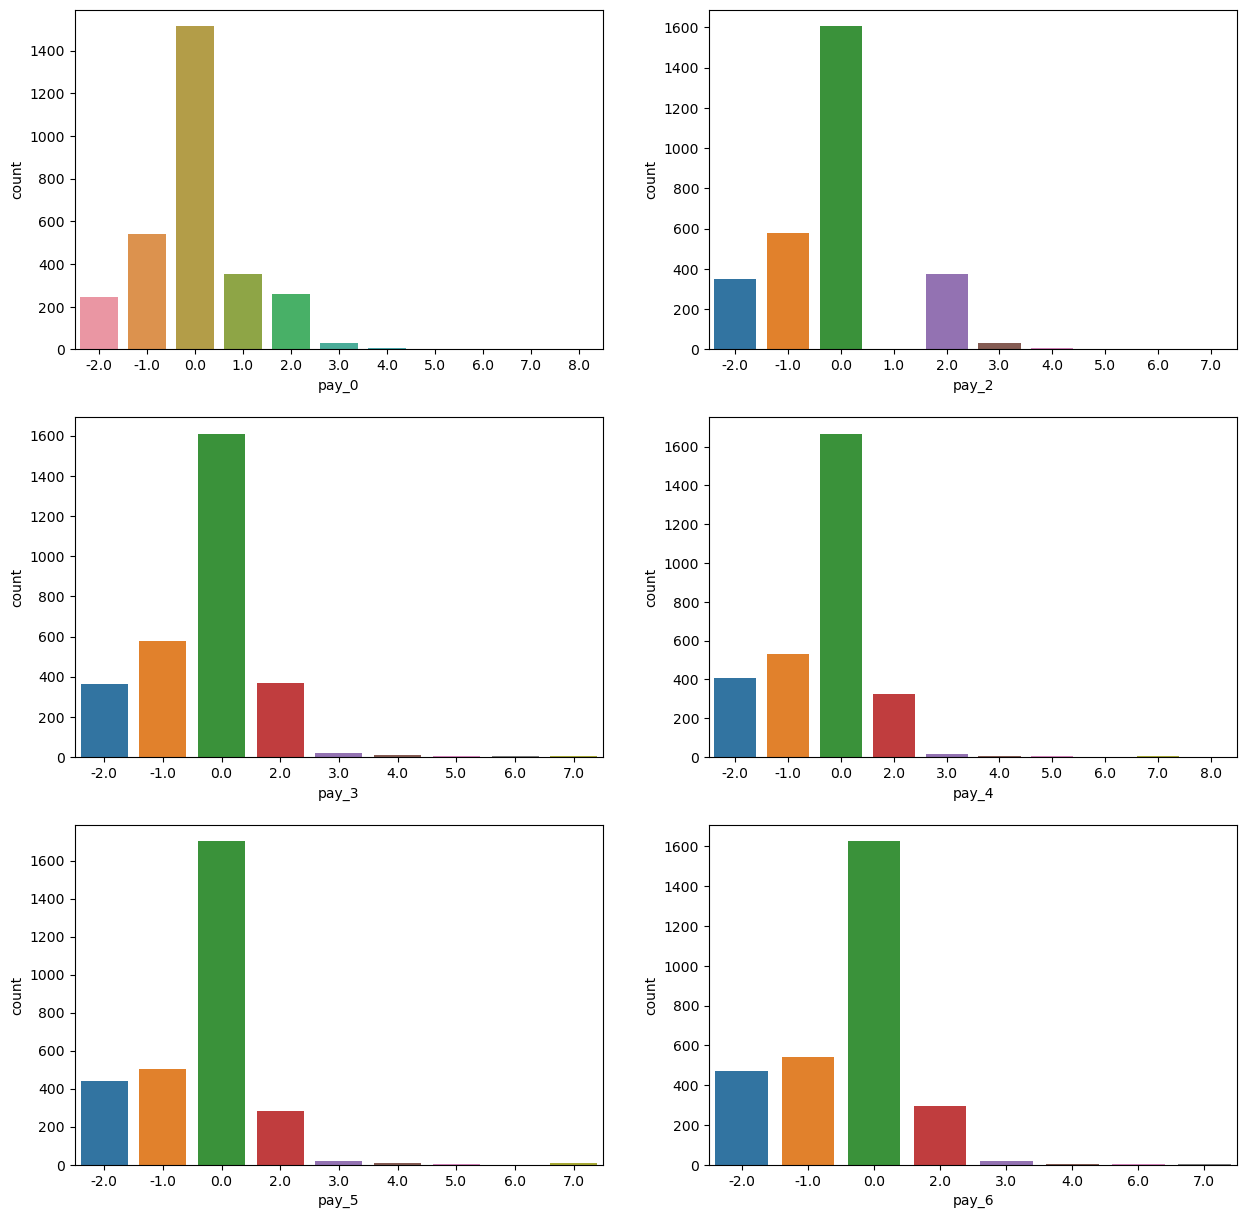

In [16]:
# show proportion of data features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
axes = axes.flatten()
sns.countplot(x='pay_0', data=df, ax=axes[0])
sns.countplot(x='pay_2', data=df, ax=axes[1])
sns.countplot(x='pay_3', data=df, ax=axes[2])
sns.countplot(x='pay_4', data=df, ax=axes[3])
sns.countplot(x='pay_5', data=df, ax=axes[4])
sns.countplot(x='pay_6', data=df, ax=axes[5]);

most repayment status in april until september is ontime payment(pay duly). Next, we wat to count repayment status for each column

### Limit Balance

next features we want to explore is limit_balance column. first we want to see the statistical overview of this column

In [17]:
data['limit_balance'].describe()

count      2964.000000
mean     163356.950067
std      125049.701016
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      230000.000000
max      800000.000000
Name: limit_balance, dtype: float64

here we can see the max value is too far from mean values. we can asume that the data is not normal. but, we want to plot histogram and calculate skewness of this column

1.0006047564306488

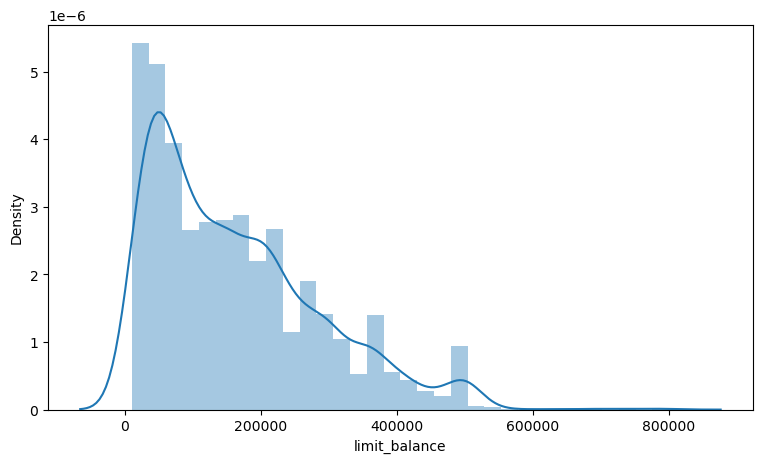

In [18]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(data.limit_balance)
data['limit_balance'].skew()

if we look at the histogram, we can say that the data is right skewed and the skewness of this data is 0,99 which is moderately skew. Since the skewness is higher than 0,5 we'll handle outlier using IQR in other step

# vi. Data Preprocessing

### Features Selection

In [19]:
data_clean = data[['limit_balance','pay_0', 'pay_2', 'pay_3', 'pay_4','pay_5', 'pay_6','default_payment_next_month']]
data_clean

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,default_payment_next_month
0,80000.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,200000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,260000.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,150000.0,0.0,0.0,0.0,-1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
2959,80000.0,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0
2960,50000.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1
2961,450000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,1
2962,50000.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,0


### Checking VIF

first, we will check the multicolinearity between our features

In [20]:
# VIF Calculator
def vif(c):
    vif = pd.DataFrame()
    vif['Column'] = c.columns
    vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]

    return vif

In [21]:
#search for multicolinearity
vif(data_clean[['limit_balance','pay_0', 'pay_2', 'pay_3', 'pay_4','pay_5', 'pay_6']])

,Column,VIF
0,limit_balance,1.123239
1,pay_0,1.850244
2,pay_2,3.131830
3,pay_3,3.401713
4,pay_4,4.080875
5,pay_5,4.811418
6,pay_6,3.210091


Here we know that the data has no multicoliniearity since Vif is not > 5

### Cardinality Checking

In [22]:
# show number of unique data on category features
for i in data_clean[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']]:
    print(i,df[i].nunique())

pay_0 11
pay_2 10
pay_3 9
pay_4 10
pay_5 9
pay_6 8


as we can see, repayment status for each month has high cardinality. before we redce cardinality, we decide to compare their columns with default payment.

In [23]:
data_clean.groupby('pay_0')['default_payment_next_month'].value_counts()

pay_0  default_payment_next_month
-2.0   0                              213
       1                               34
-1.0   0                              474
       1                               66
 0.0   0                             1319
       1                              197
 1.0   0                              244
       1                              111
 2.0   1                              193
       0                               69
 3.0   1                               26
       0                                3
 4.0   1                                4
       0                                3
 5.0   0                                2
 6.0   0                                1
 7.0   1                                2
 8.0   1                                2
       0                                1
Name: default_payment_next_month, dtype: int64

In [24]:
data_clean.groupby('pay_2')['default_payment_next_month'].value_counts()

pay_2  default_payment_next_month
-2.0   0                              294
       1                               58
-1.0   0                              503
       1                               77
 0.0   0                             1349
       1                              258
 1.0   0                                4
 2.0   1                              213
       0                              161
 3.0   1                               22
       0                               10
 4.0   0                                5
       1                                3
 5.0   0                                2
 6.0   1                                2
 7.0   1                                2
       0                                1
Name: default_payment_next_month, dtype: int64

In [25]:
data_clean.groupby('pay_3')['default_payment_next_month'].value_counts()

pay_3  default_payment_next_month
-2.0   0                              305
       1                               61
-1.0   0                              498
       1                               82
 0.0   0                             1345
       1                              265
 2.0   1                              201
       0                              167
 3.0   1                               13
       0                                9
 4.0   0                                4
       1                                4
 5.0   1                                3
 6.0   1                                3
       0                                1
 7.0   1                                3
Name: default_payment_next_month, dtype: int64

In [26]:
data_clean.groupby('pay_4')['default_payment_next_month'].value_counts()

pay_4  default_payment_next_month
-2.0   0                              339
       1                               68
-1.0   0                              454
       1                               78
 0.0   0                             1380
       1                              287
 2.0   1                              178
       0                              146
 3.0   1                                9
       0                                5
 4.0   1                                6
       0                                1
 5.0   1                                3
       0                                2
 6.0   1                                1
 7.0   1                                5
       0                                1
 8.0   0                                1
Name: default_payment_next_month, dtype: int64

In [27]:
data_clean.groupby('pay_5')['default_payment_next_month'].value_counts()

pay_5  default_payment_next_month
-2.0   0                              365
       1                               75
-1.0   0                              438
       1                               66
 0.0   0                             1394
       1                              308
 2.0   1                              160
       0                              120
 3.0   1                               13
       0                                6
 4.0   1                                5
       0                                4
 5.0   1                                2
 6.0   1                                1
 7.0   1                                5
       0                                2
Name: default_payment_next_month, dtype: int64

In [28]:
data_clean.groupby('pay_6')['default_payment_next_month'].value_counts()

pay_6  default_payment_next_month
-2.0   0                              392
       1                               77
-1.0   0                              459
       1                               81
 0.0   0                             1330
       1                              296
 2.0   1                              161
       0                              136
 3.0   1                               11
       0                               10
 4.0   1                                2
 6.0   1                                2
       0                                1
 7.0   1                                5
       0                                1
Name: default_payment_next_month, dtype: int64

as we can see, for each pay_0 - pay_6 have low value, so we can group them as 1 group.

for payment values from -2 - 0 have same meaning that is ontime payment, so we can group they too as 1 group.

In [29]:
#reduce payment duly
data_clean[['pay_0','pay_2', 'pay_3', 
            'pay_4','pay_5', 'pay_6']] = data_clean[['pay_0','pay_2', 'pay_3', 'pay_4','pay_5', 'pay_6']].replace(to_replace=[-2, -1], value=0)

#reduce payment delay for more than 4 month
data_clean[['pay_0','pay_2', 'pay_3', 
            'pay_4','pay_5', 'pay_6']] = data_clean[['pay_0','pay_2', 'pay_3', 'pay_4','pay_5', 'pay_6']].replace(to_replace=[5, 6, 7, 8], value=4)

# show cardinality after handling
for i in data_clean[['pay_0','pay_2', 'pay_3', 'pay_4','pay_5', 'pay_6']] :
        print(i, ':', data_clean[i].nunique())

pay_0 : 5
pay_2 : 5
pay_3 : 4
pay_4 : 4
pay_5 : 4
pay_6 : 4


### Train Test Split

based on the correlation against default_payment. we want to split the data into the features and target

In [30]:
# memilih fitur
x = data_clean.drop('default_payment_next_month', axis = 1)
y = data_clean['default_payment_next_month']
x

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,80000.0,0.0,0.0,0.0,0.0,0.0,0.0
1,200000.0,0.0,0.0,0.0,0.0,0.0,0.0
2,20000.0,0.0,0.0,0.0,0.0,0.0,0.0
3,260000.0,0.0,0.0,0.0,0.0,0.0,0.0
4,150000.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2959,80000.0,0.0,0.0,0.0,0.0,0.0,0.0
2960,50000.0,0.0,0.0,0.0,0.0,0.0,0.0
2961,450000.0,0.0,0.0,0.0,0.0,0.0,0.0
2962,50000.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# train test split
x_train,x_test, y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=2)
print(f'dimensi x_train: {x_train.shape}')
print(f'dimensi x_test: {x_test.shape}')
print(f'dimensi y_train: {y_train.shape}')
print(f'dimensi y_train: {y_test.shape}')

dimensi x_train: (2371, 7)
dimensi x_test: (593, 7)
dimensi y_train: (2371,)
dimensi y_train: (593,)


after we train test split the features and target. now we want to Spliting between numerical and categorical column

In [32]:
# Get Numerical Columns and Categorical Columns

num_col = ['limit_balance']
cat_col = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

print(f'Number of numerical columns: {len(num_col)}')
print(f'Numerical columns: {num_col}')
print(f'Number of categorical columns: {len(cat_col)}')
print(f'Categorical columns: {cat_col}')

x_train_num = x_train[num_col]
x_train_cat = x_train[cat_col]

x_test_num = x_test[num_col]
x_test_cat = x_test[cat_col]

Number of numerical columns: 1
Numerical columns: ['limit_balance']
Number of categorical columns: 6
Categorical columns: ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


### Handling Outlier

1.0006047564306488

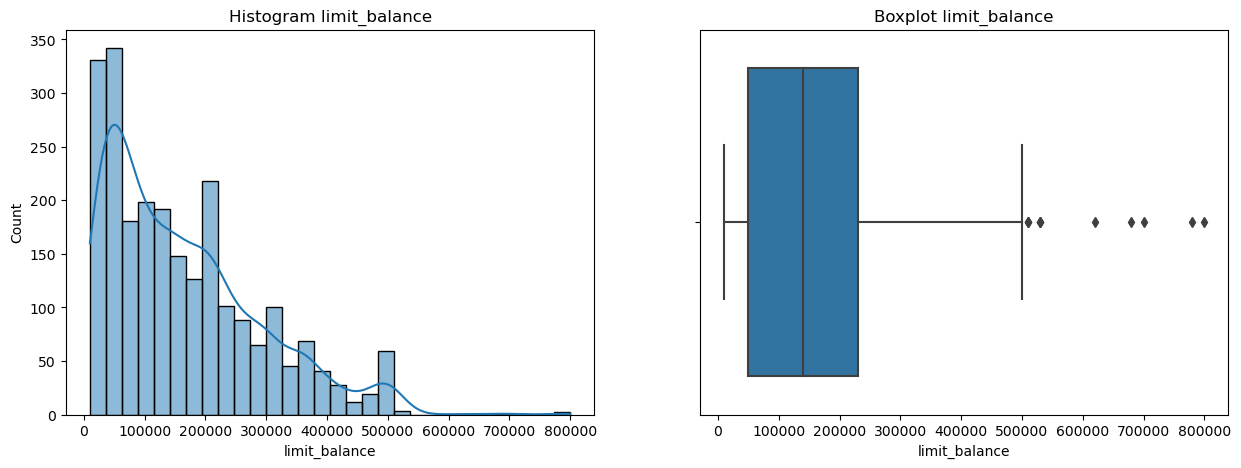

In [33]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x_train['limit_balance'],kde=True,bins =30)
plt.title('Histogram limit_balance')

plt.subplot(1,2,2)
sns.boxplot(x_train['limit_balance'])
plt.title('Boxplot limit_balance');

data_clean.limit_balance.skew()

as we can see limit_balance column has right skew with skewness is 1,0 which means moderately skewed. we will handle the outlier with capping method because we want to keep the data for our model 

In [34]:
winsoriser = Winsorizer(capping_method='iqr', 
                          tail='both', 
                          fold=3,
                          variables=['limit_balance'])

x_train_num_win = winsoriser.fit_transform(x_train_num)
x_test_num_win = winsoriser.transform(x_test_num)

In [35]:
print('x_train - Before Capping')
print(x_train_num.describe())
print('x_train - After Capping')
print(x_train_num_win.describe())
print('x_test - Before Capping')
print(x_test_num.describe())
print('X_test - After Capping')
print(x_test_num_win.describe())

x_train - Before Capping
       limit_balance
count    2371.000000
mean   162821.594264
std    125859.112738
min     10000.000000
25%     50000.000000
50%    140000.000000
75%    230000.000000
max    800000.000000
x_train - After Capping
       limit_balance
count    2371.000000
mean   162804.723745
std    125775.985625
min     10000.000000
25%     50000.000000
50%    140000.000000
75%    230000.000000
max    770000.000000
x_test - Before Capping
       limit_balance
count     593.000000
mean   165497.470489
std    121840.324216
min     10000.000000
25%     50000.000000
50%    150000.000000
75%    240000.000000
max    750000.000000
X_test - After Capping
       limit_balance
count     593.000000
mean   165497.470489
std    121840.324216
min     10000.000000
25%     50000.000000
50%    150000.000000
75%    240000.000000
max    750000.000000


after we capping the limit_balance, we see small different before and after capping. it's ok because we have low outlier from limit_balance

### Features Scaling

on this step, we want to scaling our numerical column with standardscaler method

In [36]:
scaler = StandardScaler()

x_train_num = scaler.fit_transform(x_train_num_win)
x_test_num = scaler.transform(x_test_num_win)

### Features Encoding

Because our categorical column has been encoded from dataset we got. we decide to not doing this step

In [37]:
# Concate Columns

x_train_final = np.concatenate([x_train_num, x_train_cat], axis=1)
x_test_final = np.concatenate([x_test_num, x_test_cat], axis=1)

x_train_final

array([[ 1.09102081,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.49944329,  2.        ,  0.        , ...,  0.        ,
         0.        ,  2.        ],
       [-0.49944329,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.97658252,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.25006722,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.88625286,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [38]:
x_train_final_df = pd.DataFrame(x_train_final, columns=[num_col+cat_col])
x_test_final_df = pd.DataFrame(x_test_final, columns=[num_col+cat_col])
x_train_final_df

,limit_balance,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6
0,1.091021,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.499443,2.0,0.0,0.0,0.0,0.0,2.0
2,-0.499443,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.135629,0.0,0.0,0.0,0.0,0.0,0.0
4,0.375312,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2366,1.568160,0.0,0.0,0.0,0.0,0.0,0.0
2367,-0.419920,0.0,0.0,0.0,0.0,0.0,0.0
2368,-0.976583,0.0,0.0,0.0,0.0,0.0,0.0
2369,1.250067,0.0,0.0,0.0,0.0,0.0,0.0


now we have data after features engineering

# vii. Model Definition

now we define the model that we use

In [39]:

# Defining Logistic Regression Model
log = LogisticRegression()
# Defining SVM Classifier Model
svm = SVC()
# Defining Decision Tree Classifier Model
dt = DecisionTreeClassifier()
# Defining Random Forest Classifier Model
rf = RandomForestClassifier(random_state=69)
# Defining KNN Classifier Model
knn = KNeighborsClassifier()
# Defining Naive Bayes Model
nb = GaussianNB()
# Defining AdaBoost Classifier Model
ada = AdaBoostClassifier()

The models we will use for this project are:

- Logistic Regression
- Support Vector Machine (SVM)
- Decision Tree
- Random Forest
- K - Nearest Neighbor (KNN)
- Gaussian Naive Bayes (GaussianNB)
- Ada Boosting Classifier

Then we'll choose the best model based on the cross validation score

# viii. Cross Validation

We use cross-validation to evaluate our models which is a way to check how well our models generalize to a new unseen data.

We also use StratifiedKFold because our data is imbalanced. Using this variation can make sure that the target variable distribution is approximately the same across all the folds of the cross-validation.

In [40]:
# Define Skfold using StratifiedKFold
skfold=StratifiedKFold(n_splits=5, random_state=7, shuffle=True)

# checking cross validation score
cv_log_model = cross_val_score(log, x_train_final_df, y_train, cv=skfold, scoring="recall")
cv_svm_model = cross_val_score(svm, x_train_final_df, y_train, cv=skfold, scoring="recall")
cv_dt_model = cross_val_score(dt, x_train_final_df, y_train, cv=skfold, scoring="recall")
cv_rf_model = cross_val_score(rf, x_train_final_df, y_train, cv=skfold, scoring="recall")
cv_knn_model = cross_val_score(knn, x_train_final_df, y_train, cv=skfold, scoring="recall")
cv_nb_model = cross_val_score(nb, x_train_final_df, y_train, cv=skfold, scoring="recall")
cv_ada_model = cross_val_score(ada, x_train_final_df, y_train, cv=skfold, scoring="recall")
name_model = []
cv_scores=0
for cv,name in zip([cv_log_model,cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_nb_model,cv_ada_model],['log','svm','dt','rf','knn','nb','ada']):
    print(name)
    print('recall - All - Cross Validation  : ', cv)
    print('recall - Mean - Cross Validation : ', cv.mean())
    print('recall - Std - Cross Validation  : ', cv.std())
    print('recall - Range of Test-Set       : ', (cv.mean()-cv.std()) , '-', (cv.mean()+cv.std()))
    print('-'*50)
    if cv.mean()>cv_scores:
        cv_scores = cv.mean()
        name_model = name
    else:
        pass
print('best model:', name_model)
print('cross-val mean:', cv_scores)

log
recall - All - Cross Validation  :  [0.39215686 0.36633663 0.34313725 0.3627451  0.35294118]
recall - Mean - Cross Validation :  0.36346340516404585
recall - Std - Cross Validation  :  0.016467881443858
recall - Range of Test-Set       :  0.3469955237201878 - 0.3799312866079039
--------------------------------------------------
svm
recall - All - Cross Validation  :  [0.43137255 0.37623762 0.39215686 0.41176471 0.47058824]
recall - Mean - Cross Validation :  0.41642399534071056
recall - Std - Cross Validation  :  0.032810886334029114
recall - Range of Test-Set       :  0.38361310900668144 - 0.4492348816747397
--------------------------------------------------
dt
recall - All - Cross Validation  :  [0.32352941 0.31683168 0.31372549 0.25490196 0.3627451 ]
recall - Mean - Cross Validation :  0.3143467287905261
recall - Std - Cross Validation  :  0.03454552124805801
recall - Range of Test-Set       :  0.2798012075424681 - 0.3488922500385841
---------------------------------------------

As we can see that the best model for our problem is GaussianNB, because it has the highest mean of recall score in our cross validation process. We use recall score because we want to know the total number of actual positive cases, which recall will measure the model's ability to correctly identify positive cases. Also it can be used better on imbalanced data

After we got our best model using Naive Bayes, we want to train the data using our best model

In [41]:
nb.fit(x_train_final_df, y_train)

GaussianNB()

and then we want to predict our train and test data

In [42]:
nb_pred_train = nb.predict(x_train_final_df)
nb_pred_test = nb.predict(x_test_final_df)

In [43]:
target_names = ['No', 'Yes']
print("=="*12,"Train","=="*12)
print(classification_report(y_train,nb_pred_train,zero_division=0, target_names = target_names))
print("=="*12,"Test","=="*12)
print(classification_report(y_test,nb_pred_test,zero_division=0, target_names = target_names))

======================== Train ========================
              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1862
         Yes       0.55      0.45      0.50       509

    accuracy                           0.80      2371
   macro avg       0.70      0.68      0.69      2371
weighted avg       0.79      0.80      0.80      2371

======================== Test ========================
              precision    recall  f1-score   support

          No       0.87      0.90      0.88       467
         Yes       0.57      0.49      0.53       126

    accuracy                           0.81       593
   macro avg       0.72      0.70      0.71       593
weighted avg       0.81      0.81      0.81       593



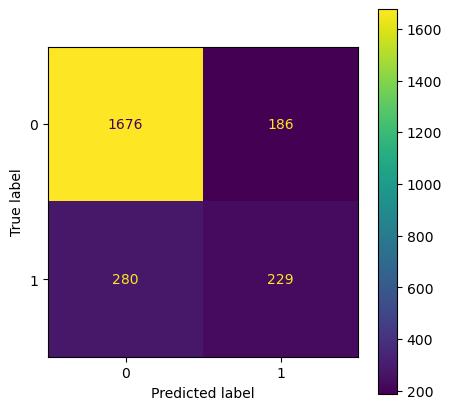

In [44]:
f,ax = plt.subplots(1,1,figsize=(5,5))
print(ConfusionMatrixDisplay.from_estimator(nb, x_train_final_df, y_train, ax=ax))

From Confussion matrix from train predict, we see that with our model we predict 280 False Negative which means the classification predict not pay, in reality is not pay

From Confussion matrix from train predict, we see that with our model we predict 262 True Positive which means the classification predict pay, in reality is pay

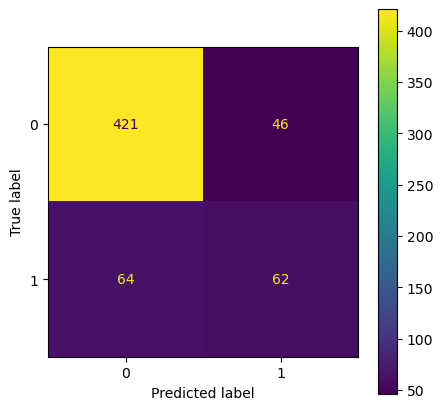

In [45]:
f,ax = plt.subplots(1,1,figsize=(5,5))
print(ConfusionMatrixDisplay.from_estimator(nb, x_test_final_df, y_test, ax=ax))

Now, let's tuning our data using Hyperpaarameter Tuning to ensure that the data have a good recall score.

# ix. Hyperparameter Tuning

In [46]:
hyperparameters = {
    'var_smoothing': np.logspace(0,-9, num=10)
}

nb_grid = GridSearchCV(nb, hyperparameters, cv = 10, scoring='recall', return_train_score=True)
nb_grid.fit(x_train_final_df, y_train)

GridSearchCV(cv=10, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])},
             return_train_score=True, scoring='recall')

From our grid search above, there are some important thing you'll need to know :

- We defined a 10 time cross validation fold which implies that we're splitting our data into 10 subsets which our algorithm will check those subsets with all the features applied.

- Because our objective in tuning is we want to minimize the False Negatives by boosting up our recall value, we defined our scoring in grid search as Recall.

- For hyperparameter, we only can use var_smoothing because tuning in GaussianNB is limited

After the grid search finished we can see the best combination of hyperparameters, it's time to see what the best parameters are :

In [47]:
nb_grid.best_params_

{'var_smoothing': 0.001}

In [48]:
nb_grid.best_score_

0.46952941176470586

Here we have the same score, with our model before tuning. But we will try to see this model in a whole.

In [49]:
nb_df = pd.DataFrame(nb_grid.cv_results_)[['params', 'mean_test_score', 'std_test_score', 'mean_train_score', 'std_train_score']]
nb_df.sort_values(['mean_test_score', 'mean_train_score'], ascending=False) 

,params,mean_test_score,std_test_score,mean_train_score,std_train_score
4,{'var_smoothing': 0.0001},0.469529,0.070768,0.468025,0.027033
5,{'var_smoothing': 1e-05},0.469529,0.070768,0.468025,0.027033
6,{'var_smoothing': 1e-06},0.469529,0.070768,0.468025,0.027033
7,{'var_smoothing': 1e-07},0.469529,0.070768,0.468025,0.027033
8,{'var_smoothing': 1e-08},0.469529,0.070768,0.468025,0.027033
9,{'var_smoothing': 1e-09},0.469529,0.070768,0.468025,0.027033
3,{'var_smoothing': 0.001},0.469529,0.070768,0.467151,0.027150
2,{'var_smoothing': 0.01},0.463647,0.066793,0.456673,0.020259
1,{'var_smoothing': 0.1},0.438157,0.044252,0.438114,0.004925
0,{'var_smoothing': 1.0},0.306627,0.046032,0.306703,0.006046


In [50]:
nb_grid.best_estimator_

GaussianNB(var_smoothing=0.001)

In [51]:
nb_tuned = nb_grid.best_estimator_

In [52]:
nb_tuned.fit(x_train_final_df, y_train)

GaussianNB(var_smoothing=0.001)

In [53]:
nb_tuned_pred_train = nb_tuned.predict(x_train_final_df)
nb_tuned_pred_test = nb_tuned.predict(x_test_final_df)

# x. Model Evaluation

Here we want to use our tuned model and compare it with model before tuning

In [54]:
print('Before Tuning : ')
target_names = ['No', 'Yes']
print("=="*11,"TRAINING","=="*11)
print(classification_report(y_train,nb_pred_train,zero_division=0, target_names = target_names))
print("=="*12,"TEST","=="*12)
print(classification_report(y_test,nb_pred_test,zero_division=0, target_names = target_names))
print('After Tuning : ')
target_names = ['No', 'Yes']
print("=="*11,"TRAINING","=="*11)
print(classification_report(y_train,nb_tuned_pred_train,zero_division=0, target_names = target_names))
print("=="*12,"TEST","=="*12)
print(classification_report(y_test,nb_tuned_pred_test,zero_division=0, target_names = target_names))

Before Tuning : 
====================== TRAINING ======================
              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1862
         Yes       0.55      0.45      0.50       509

    accuracy                           0.80      2371
   macro avg       0.70      0.68      0.69      2371
weighted avg       0.79      0.80      0.80      2371

======================== TEST ========================
              precision    recall  f1-score   support

          No       0.87      0.90      0.88       467
         Yes       0.57      0.49      0.53       126

    accuracy                           0.81       593
   macro avg       0.72      0.70      0.71       593
weighted avg       0.81      0.81      0.81       593

After Tuning : 
====================== TRAINING ======================
              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1862
         Yes       0.55      0.45      

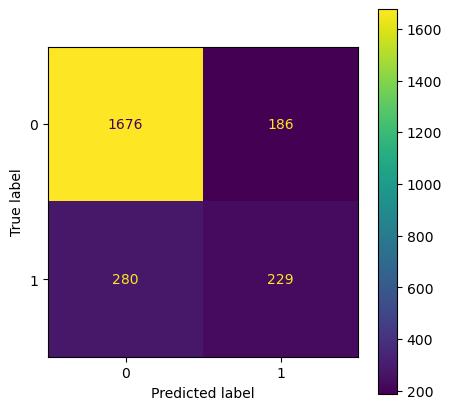

In [55]:
f,ax = plt.subplots(1,1,figsize=(5,5))
print(ConfusionMatrixDisplay.from_estimator(nb_tuned, x_train_final_df, y_train, ax=ax))

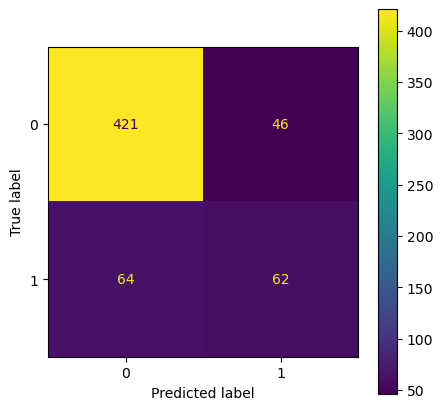

In [56]:
f,ax = plt.subplots(1,1,figsize=(5,5))
print(ConfusionMatrixDisplay.from_estimator(nb_tuned, x_test_final_df, y_test, ax=ax))

same as above, the result is the same with our first model without Tuning

# xi. Conclusion

1. In our Exploratory Data Analysis, we saw there is an imbalance proportions within our target label `default_payment_next_month`. If we look at our data description, we have alot of 0 data.
2. We have 7 models as the candidate best model for our data. We cross validate each of the models in search of finding our most consistent model in terms of mean and standard deviation by recall score. We use recall score because we want to know the total number of actual positive cases, which recall will measure the model's ability to correctly identify positive cases. Also it can be used better on unbalanced data.
3. We got GaussianNB as our best model using cross validation score.
4. We compared GaussianNB and the tuned GaussianNB. both model is good fit because train and test has no significant different both of them.

# xii. Conceptual Problem

### Question 1
Apa yang dimaksud dengan criterion pada Decision Tree ? Jelaskan criterion yang kalian pakai dalam kasus ini!

### Answer 1

Criterion pada Decision Tree adalah metode atau formula yang digunakan untuk mengukur kualitas pemisahan (split) antara data yang berbeda pada setiap simpul (node) di dalam pohon keputusan.

Pada umumnya, ada dua kriteria yang sering digunakan dalam Decision Tree yaitu Gini Index dan Entropy. Kriteria Gini Index mengukur seberapa seragam kelas target di antara kelompok data yang dipisahkan, sedangkan kriteria Entropy mengukur seberapa tidak pastinya kelas target di antara kelompok data yang dipisahkan.

### Question 2

Jelaskan apa yang dimaksud dengan pruning pada Tree-based model (alasan, definisi, jenis, dll) !

### Answer 2

Pruning pada Tree-based model merujuk pada proses penghapusan simpul (node) dan cabang (branch) yang tidak diperlukan pada pohon keputusan (decision tree) untuk meningkatkan kinerja dan generalisasi model.

Alasan untuk melakukan pruning adalah untuk mencegah overfitting, yaitu saat model terlalu kompleks dan mampu mengingat data training dengan sangat baik, namun gagal untuk menggeneralisasi pada data baru. Dalam kasus ini, pohon keputusan dapat menjadi sangat dalam dan rumit, dan mungkin memisahkan data dengan sangat baik, tetapi juga bisa menjadi terlalu spesifik pada data training dan gagal menggeneralisasi pada data yang belum pernah dilihat sebelumnya.

Pruning biasanya dilakukan setelah pohon keputusan selesai dibuat dengan menggunakan algoritma tree-building seperti CART atau C4.5. Terdapat dua jenis pruning yang umum digunakan:

- Pre-Pruning: yaitu proses penghapusan simpul dan cabang saat membuat pohon keputusan untuk mencegah overfitting. Contohnya, penggunaan parameter minimum sample split atau minimum sample leaf untuk memutuskan apakah suatu simpul harus dibagi atau tidak.

- Post-Pruning: yaitu proses penghapusan simpul dan cabang setelah pohon keputusan selesai dibuat untuk mengurangi overfitting. Contohnya, Reduced Error Pruning (REP) dan Cost-Complexity Pruning (CCP).

Reduced Error Pruning (REP) melibatkan proses rekursif di mana simpul yang dapat dihapus secara aman dihapus dari pohon keputusan dan diganti dengan simpul yang menyimpulkan kelas mayoritas dari simpul yang dihapus. Proses diulang sampai tidak ada simpul lagi yang dapat dihapus.

Cost-Complexity Pruning (CCP) menggunakan parameter alpha untuk mengevaluasi kompleksitas pohon keputusan. Algoritma CCP menghasilkan serangkaian pohon keputusan dengan tingkat kompleksitas yang berbeda dan memilih pohon dengan nilai alpha yang paling optimal.

Pruning sangat penting dalam pengembangan model tree-based untuk menghindari overfitting dan memastikan model yang dihasilkan dapat menggeneralisasi dengan baik pada data baru.

Source: https://media.neliti.com/media/publications/245242-none-4c86e369.pdf

### Question 3 

Bagaimana cara memilih K yang optimal pada KNN ?

### Answer 3

Untuk memilih nilai k yang optimal pada algoritma K-Nearest Neighbor (KNN), dapat dilakukan dengan menggunakan metode validasi silang (cross-validation) dan mencari k yang memberikan akurasi prediksi tertinggi pada data validasi.

Berikut adalah langkah-langkah untuk memilih nilai k yang optimal pada algoritma KNN:

- Bagi dataset menjadi dua bagian, yaitu data latih (training set) dan data uji (testing set).

- Pilih sejumlah nilai k yang akan diuji, misalnya k = 1, 3, 5, 7, dan 9.

- Untuk setiap nilai k, lakukan proses pelatihan (training) pada data latih dan hitung akurasi prediksi pada data uji.

- Lakukan validasi silang dengan membagi data latih menjadi beberapa bagian (misalnya 5 atau 10 bagian) dan lakukan pelatihan dan pengujian pada setiap bagian secara bergantian. Kemudian hitung akurasi rata-rata dari seluruh bagian.

- Pilih nilai k yang memberikan akurasi prediksi tertinggi pada data uji atau akurasi rata-rata tertinggi pada validasi silang.

- Gunakan nilai k yang dipilih untuk melakukan pelatihan pada seluruh data latih dan evaluasi performa pada data uji.

Langkah-langkah ini dapat dilakukan dengan menggunakan library machine learning seperti Scikit-learn di Python atau menggunakan bahasa pemrograman lainnya. Proses ini membantu dalam memilih nilai k yang optimal sehingga dapat meningkatkan akurasi dan kinerja model KNN.

Source: https://ilmudatapy.com/algoritma-k-nearest-neighbor-knn-untuk-klasifikasi/

### Question 4

Jelaskan apa yang dimaksud dengan Cross Validation !

### Answer 4

Cross-validation (CV) adalah metode statistik yang dapat digunakan untuk mengevaluasi kinerja model atau algoritma dimana data dipisahkan menjadi dua subset yaitu data proses pembelajaran dan data validasi / evaluasi. Model atau algoritma dilatih oleh subset pembelajaran dan divalidasi oleh subset validasi. Selanjutnya pemilihan jenis CV dapat didasarkan pada ukuran dataset. Biasanya CV K-fold digunakan karena dapat mengurangi waktu komputasi dengan tetap menjaga keakuratan estimasi.

Source: https://mti.binus.ac.id/2017/11/24/10-fold-cross-validation/#:~:text=Cross%2Dvalidation%20(CV)%20adalah,dan%20divalidasi%20oleh%20subset%20validasi.

### Question 5 

Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?

### Answer 5

Accuracy, precision, recall, dan F1 score adalah metrik evaluasi performa model machine learning. Berikut adalah penjelasan masing-masing metrik dan kapan waktu yang tepat untuk menggunakannya:

Accuracy
Accuracy adalah rasio jumlah prediksi yang benar (true positives and true negatives) dengan jumlah total data yang diuji. Metrik ini cocok digunakan untuk dataset yang seimbang dan memiliki proporsi kelas yang sama. Namun, jika dataset tidak seimbang, accuracy tidak dapat memberikan informasi yang akurat tentang performa model.

Precision
Precision adalah rasio jumlah prediksi benar positif (true positives) dengan jumlah total prediksi positif. Metrik ini cocok digunakan ketika kita ingin memastikan bahwa setiap hasil positif adalah benar. Contohnya pada kasus diagnosis penyakit, di mana kita ingin memastikan bahwa setiap pasien yang didiagnosis positif memiliki penyakit.

Recall
Recall adalah rasio jumlah prediksi benar positif (true positives) dengan jumlah total data yang sebenarnya positif (true positives and false negatives). Metrik ini cocok digunakan ketika kita ingin memastikan bahwa semua hasil positif telah ditemukan. Contohnya pada kasus deteksi penipuan, di mana kita ingin memastikan bahwa semua transaksi penipuan telah terdeteksi.

F1 Score
F1 score adalah rata-rata harmonik antara precision dan recall. Metrik ini cocok digunakan ketika kita ingin mencapai keseimbangan antara precision dan recall. F1 score akan menjadi rendah jika salah satu precision atau recall rendah. Metrik ini cocok digunakan pada dataset yang tidak seimbang.

Pemilihan metrik yang tepat tergantung pada jenis data dan tujuan dari model machine learning. Penting untuk memilih metrik yang cocok agar dapat mengevaluasi performa model dengan akurat. Jika tujuan dari model adalah memaksimalkan precision, maka precision harus dipilih sebagai metrik evaluasi. Jika dataset tidak seimbang, maka F1 score atau recall harus dipilih sebagai metrik evaluasi. Sedangkan jika dataset seimbang, maka accuracy dapat dipilih sebagai metrik evaluasi.

Source: https://stevkarta.medium.com/membicarakan-precision-recall-dan-f1-score-e96d81910354

# xiii. Model Saving

In [57]:
with open('nb_tuned.pkl', 'wb') as file_1:
  joblib.dump(nb_tuned, file_1)

with open('scaler.pkl', 'wb') as file_2:
  joblib.dump(scaler, file_2)

with open('num_col.pkl', 'wb') as file_3:
  joblib.dump(num_col, file_3)

with open('cat_col.pkl', 'wb') as file_4:
  joblib.dump(cat_col, file_4)